In [1]:
from earclip import EarClipTriangulation
import numpy as np
import matplotlib

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation


star = [(150, 25), (179, 111), (269, 111), (197, 165), (223, 251), (150, 200), (77, 251), (103, 165), (31, 111), (121, 111)]
moon = [(5, 15), (6, 14), (8, 12), (9, 10), (9, 8), (8, 6), (7, 4), (5, 2), (3, 1), (6, 1), (8, 1), (10, 2), (12, 4), (13, 7), (13, 10), (12, 12), (10, 14), (7, 15)]
leave = [(1, -3), (5, -4), (4, -3), (9, 1), (7, 2), (8, 5), (5, 4), (5, 5), (3, 4), (4, 9), (2, 7), (0, 10), (-2, 7), (-4, 8), (-3, 3), (-5, 6), (-5, 4), (-8, 5), (-7, 2), (-9, 1), (-4, -3), (-5, -4), (0, -3), (2, -7), (2, -6), (1, -3)]

In [2]:
def _get_triangles_patches(triangles):
    patches = []
    for triangle in triangles:
        patches.append(
            plt.Polygon(triangle.get_points(), closed=True, fill=None, edgecolor='g')
        )
    return patches

def _draw_polygon_triangulation(polygon, triangles):
    plt.style.use('ggplot')
    fig = plt.figure(figsize=(11, 11))
    axis_max = np.max(polygon, axis=0) + abs(np.max(polygon, axis=0) / 10)
    axis_min = np.min(polygon, axis=0) - abs(np.min(polygon, axis=0) / 10)
    distance = np.max([
        (abs(axis_min[0]) + abs(axis_max[0])), (abs(axis_min[1]) + abs(axis_max[1]))]
    )
    ax = plt.axes(xlim=(axis_min[0], axis_min[0] + distance), ylim=(axis_min[1], axis_min[1] + distance))
    
    polygon_frame = plt.Polygon(polygon, linewidth=1.4, closed=True, fill=None, edgecolor='gray')
    frame = ax.add_patch(polygon_frame)
    for tr in triangles:
        ax.plot([tr.p1.x, tr.p3.x], [tr.p1.y, tr.p3.y], "g")
    plt.show()

## Ear clipping polygon triangulation

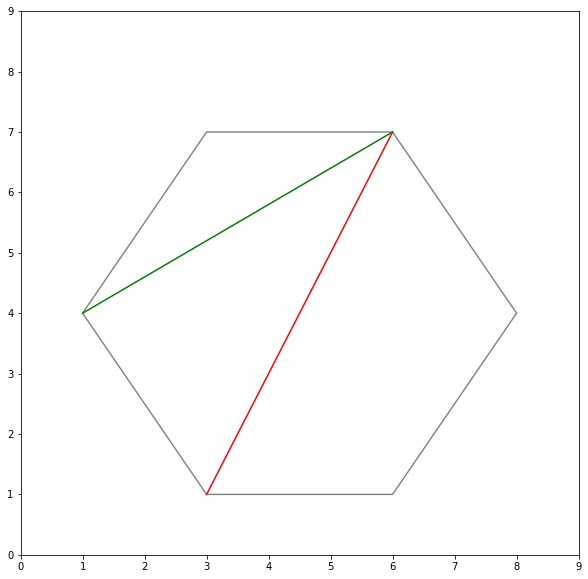

In [3]:
polygon = [(1, 4), (3, 1), (6, 1), (8, 4), (6, 7), (3, 7)]
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(xlim=(0, 9), ylim=(0, 9))

earclip = EarClipTriangulation()



pol = plt.Polygon(polygon, linewidth=1.4, closed=True, fill=None, edgecolor='gray')
plt.plot([3, 6], [1, 7], "r")
plt.plot([1, 6], [4, 7], "g")
frame = ax.add_patch(pol)
plt.show()

#### Ear criterias
- Ear Area > 0 (e.g. not just a line) 
- Area contains no points
- Ear angle is convex (e.g. < 180 degrees)

### Build all ears

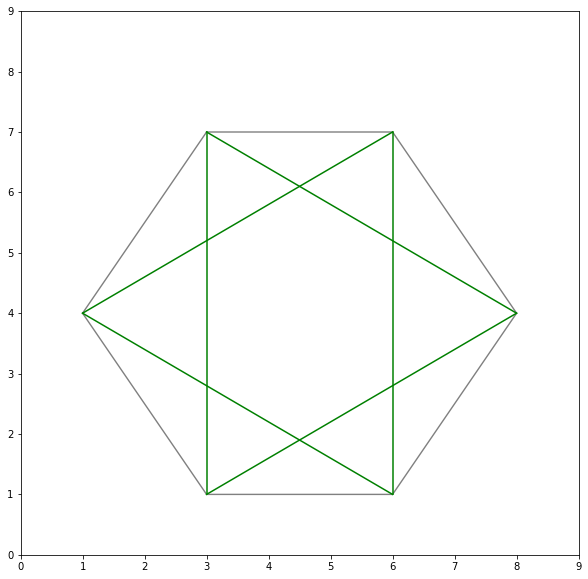

In [4]:
polygon = [(1, 4), (3, 1), (6, 1), (8, 4), (6, 7), (3, 7)]
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(xlim=(0, 9), ylim=(0, 9))

earclip = EarClipTriangulation()



pol = plt.Polygon(polygon, linewidth=1.4, closed=True, fill=None, edgecolor='gray')
frame = ax.add_patch(pol)
for el in earclip.get_ears(polygon):
    plt.plot([el.p1.x, el.p3.x], [el.p1.y, el.p3.y], "g")
plt.show()

## Cut one of the ears

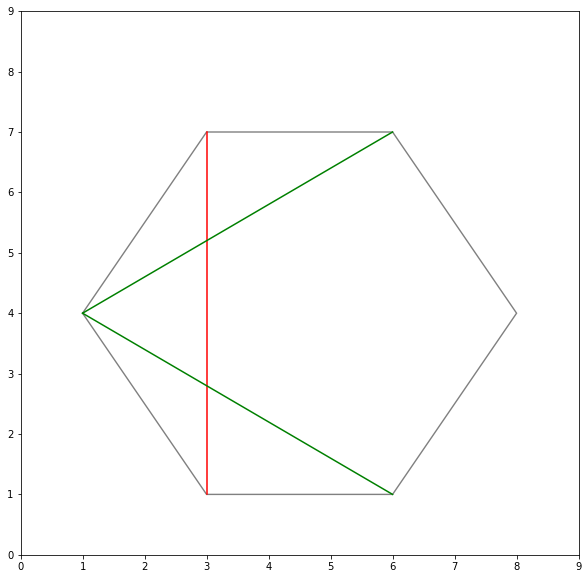

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(xlim=(0, 9), ylim=(0, 9))

pol = plt.Polygon(polygon, linewidth=1.4, closed=True, fill=None, edgecolor='gray')
plt.plot([3, 3], [1, 7], "r")
plt.plot([1, 6], [4, 7], "g")
plt.plot([1, 6], [4, 1], "g")

frame = ax.add_patch(pol)

## Fix wrong ears

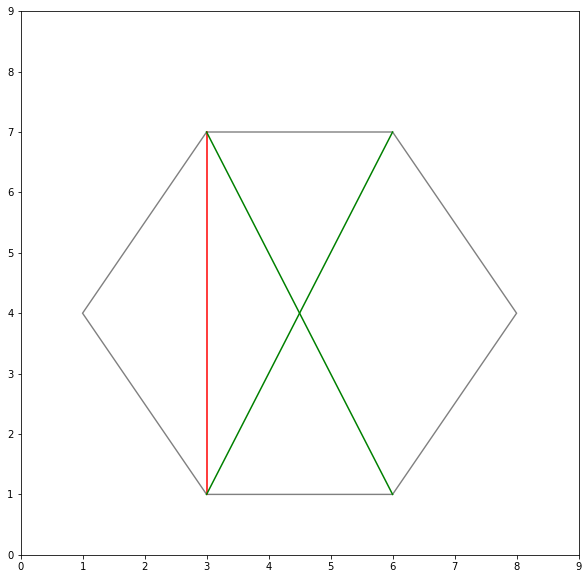

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(xlim=(0, 9), ylim=(0, 9))

pol = plt.Polygon(polygon, linewidth=1.4, closed=True, fill=None, edgecolor='gray')
plt.plot([3, 3], [1, 7], "r")
plt.plot([3, 6], [1, 7], "g")
plt.plot([3, 6], [7, 1], "g")

frame = ax.add_patch(pol)

## Continue until done

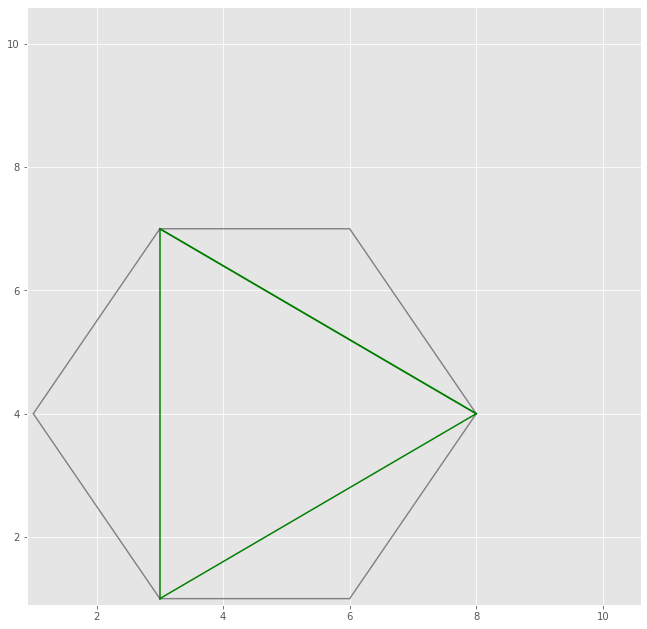

In [7]:
polygon = [(1, 4), (3, 1), (6, 1), (8, 4), (6, 7), (3, 7)]

earclip = EarClipTriangulation()
triangles = earclip.triangulate(polygon)
_draw_polygon_triangulation(polygon, triangles)

## A bit more...

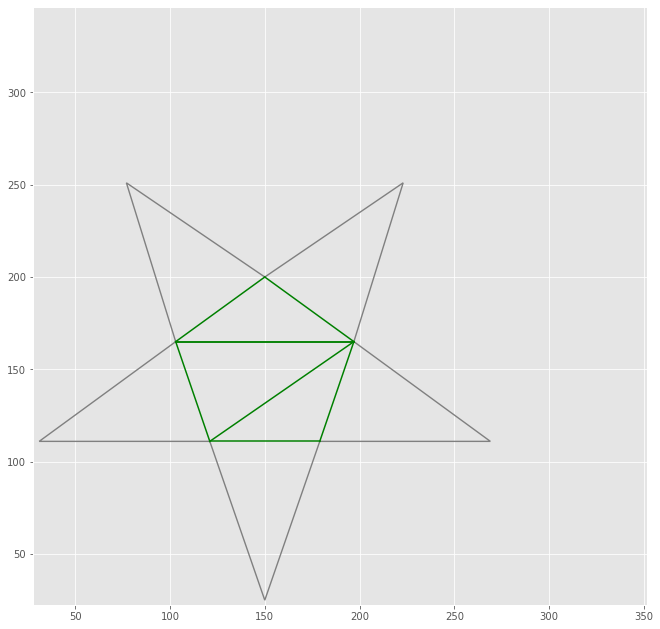

In [8]:
earclip = EarClipTriangulation()
triangles = earclip.triangulate(star)
_draw_polygon_triangulation(star, triangles)

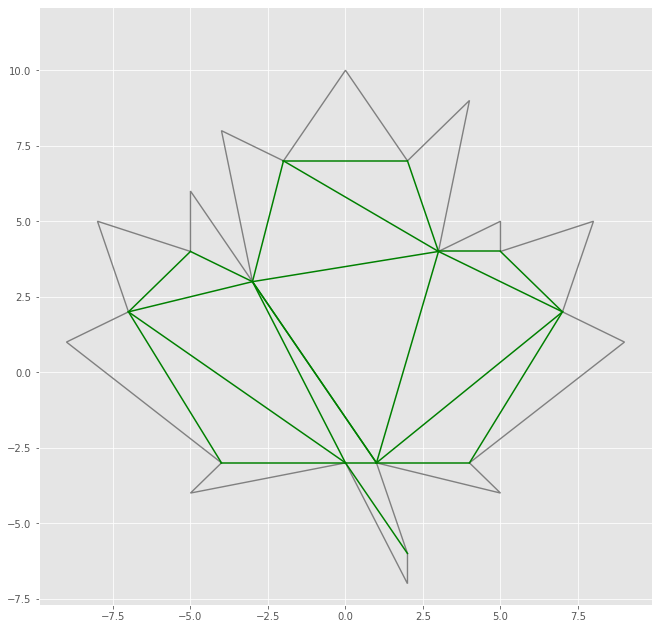

In [9]:
earclip = EarClipTriangulation()
triangles = earclip.triangulate(leave)
_draw_polygon_triangulation(leave, triangles)

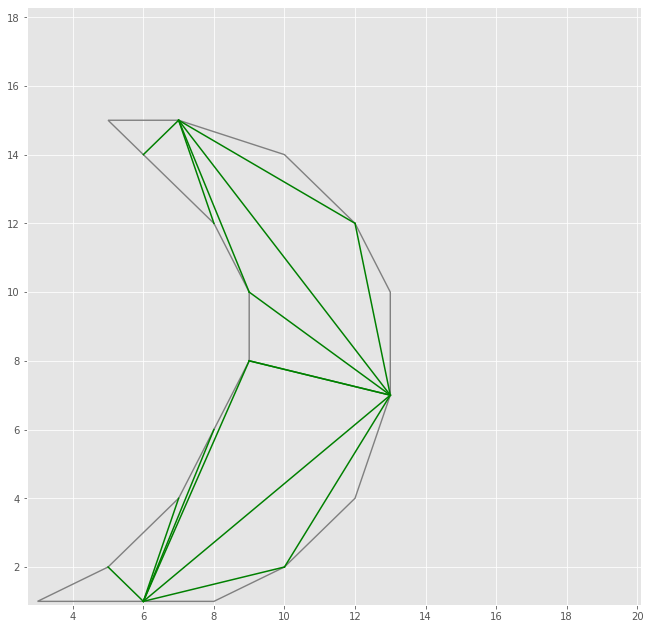

In [10]:
earclip = EarClipTriangulation()
triangles = earclip.triangulate(moon)
_draw_polygon_triangulation(moon, triangles)

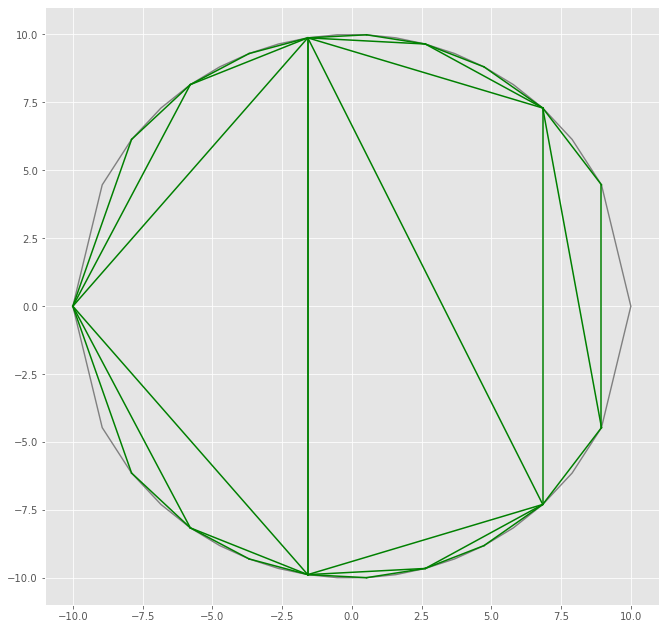

In [12]:
n = 20
x = np.linspace(-10, 10, num=n)
y_top = np.sqrt(100 - x**2)
y_bot = -np.sqrt(100 - x**2)

xx = np.concatenate((np.flip(x)[:-1], x[:-1]))
yy = np.concatenate((y_top[:-1], y_bot[:-1]))
my_polygon = [[x,y] for x, y in zip(xx, yy)]

earclip = EarClipTriangulation()
triangles = earclip.triangulate(my_polygon)
_draw_polygon_triangulation(my_polygon, triangles)